<a href="https://colab.research.google.com/github/sm160388/Capstone-3/blob/main/5th%20commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **Objective**

We need to create a model that can predict, based on the data provided, whether current policyholders are also interested in vehicle insurance provided by the company.



#**Importing the libraries**

In [ ]:
#importing libraries for data handelling
import numpy as np
import pandas as pd
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Loading the dataset**

In [ ]:
path= "/content/drive/MyDrive/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"

In [ ]:
df= pd.read_csv(path)

In [ ]:
df.shape

(381109, 12)

In [ ]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Checking the null values**

In [ ]:
# Checking for NUll Values
df.isna().sum().to_frame().rename(columns={0:'Missing Value '})

,Missing Value
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


# No null values found in this dataset.

###Checking Duplicates in the dataset

In [ ]:
#Finding Duplicate values
len(df[df.duplicated()])

0

No Duplicate Values found

#**Visualization**

**Target Variable**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


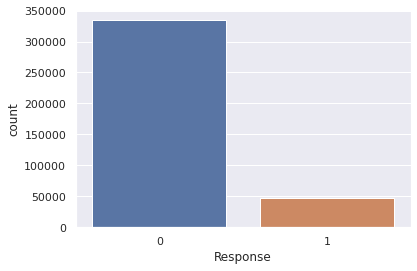

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(df['Response'], data=df)



*   The data is highly imbalanced.




**Univariate Analysis**

Let us go through variables individually and analyse them.

**Gender**

In [ ]:
# Percentage For Response Column
(df['Gender'].value_counts() / df['Gender'].count()) * 100

Male      54.07613
Female    45.92387
Name: Gender, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


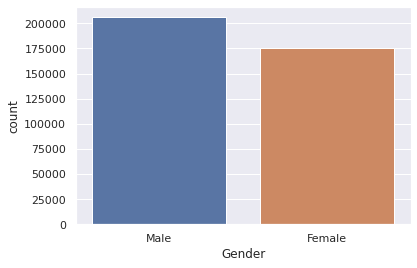

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(df['Gender'], data=df)

we see that Males are more interested in buying a insurance rather than females.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


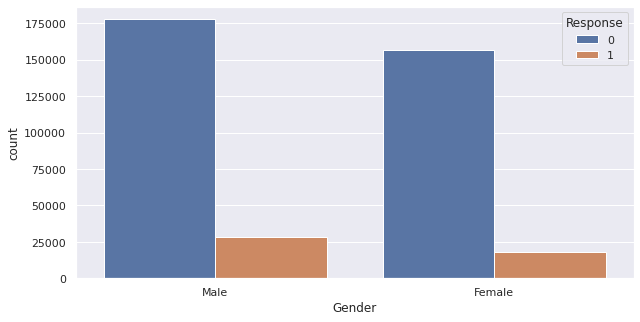

In [ ]:
#Gender vs response
plt.figure(figsize=(10,5))
sns.countplot(df['Gender'],hue=df['Response'],data=df)



*   The gender variable in the dataset is almost equally distributed.

*   Male category is slightly greater than that of female and chances of   buying  the insurance is also little high.
 








**Age**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


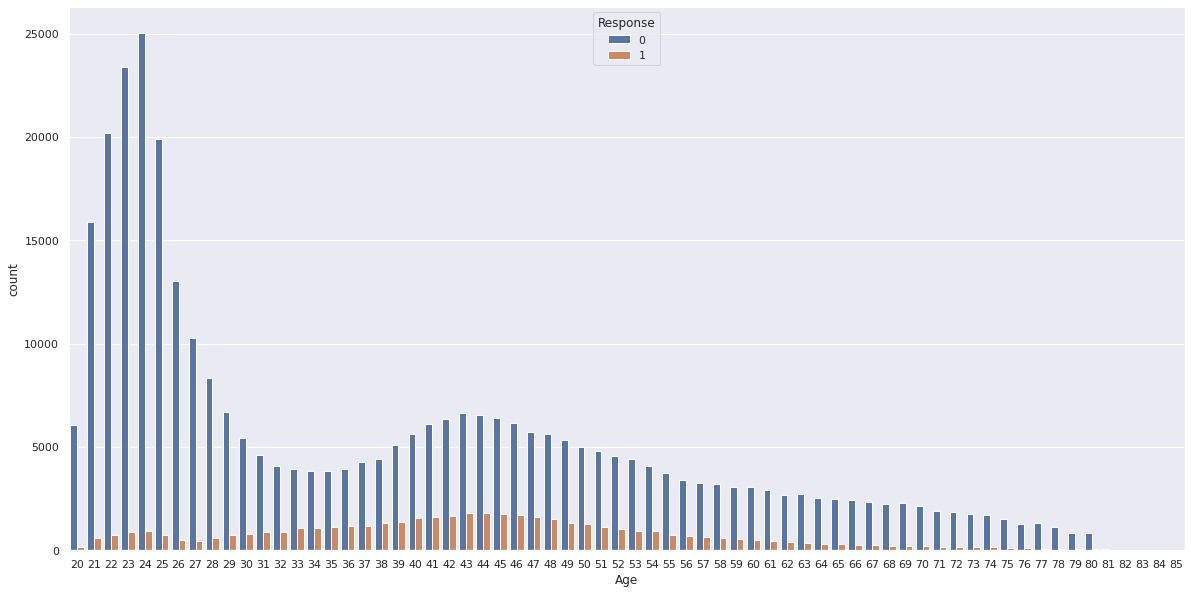

In [ ]:
#age vs response
plt.figure(figsize=(20,10))
sns.countplot(df["Age"],hue=df["Response"],data=df)

**Vehicle Age**

In [ ]:
df["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


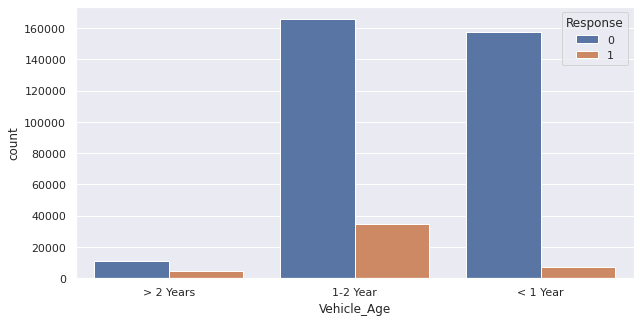

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['Vehicle_Age'],hue=df['Response'],data=df)


*  95 % of health insurance customers have vehichle that's less than 2 years of age 

*   Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

*   Customers with Vehicle_Age >2 years have very less chance of buying Insurance

**Vehicle Damage**

In [ ]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [ ]:
# Percentage For Vechile Damage
(df['Vehicle_Damage'].value_counts() / df['Vehicle_Damage'].count()) * 100

Yes    50.487656
No     49.512344
Name: Vehicle_Damage, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Vechile Damage(Yes/No)')

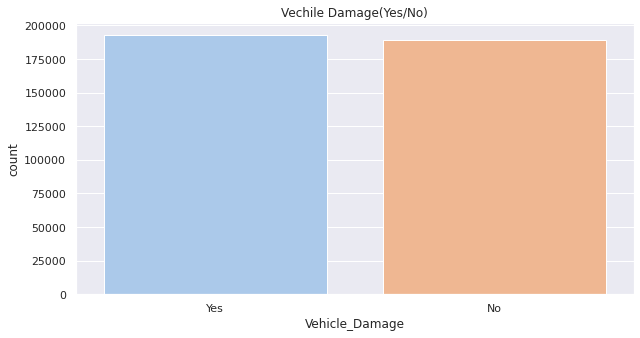

In [ ]:
plt.figure(figsize = (10 ,5))
sns.countplot(df['Vehicle_Damage'], palette = 'pastel')
plt.title('Vechile Damage(Yes/No)')






*   half of the health insurance customer have had their vehicle damaged and half have not.





**Driving License**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


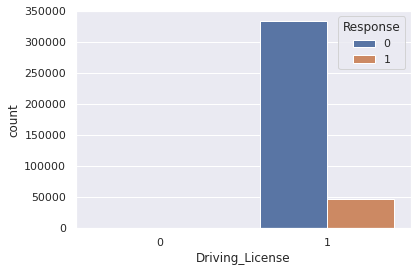

In [ ]:
#Driving license vs Response
sns.countplot(df['Driving_License'],hue=df['Response'])



*   Customers who are interested in Vehicle Insurance almost all have driving license.



**Previously insured**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


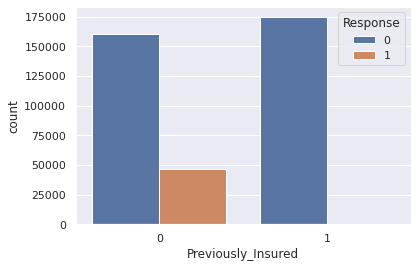

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


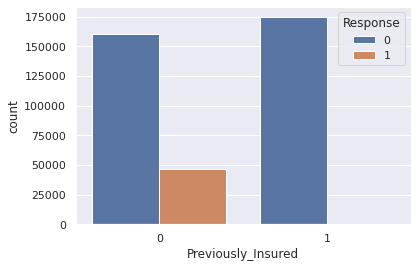

In [ ]:
sns.countplot(df['Previously_Insured'],hue=df['Response']) 

**Response**

In [ ]:
df ['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
# Percentage For Response Column
(df['Response'].value_counts() / df['Response'].count()) * 100

0    87.743664
1    12.256336
Name: Response, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


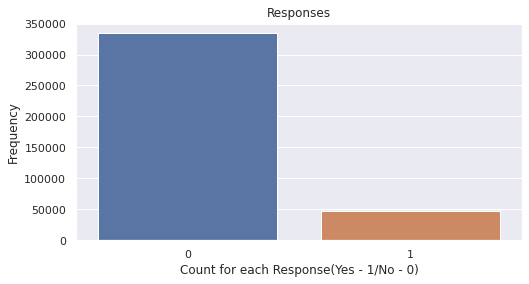

In [ ]:
# Ploting count plot for Vechile Age column

plt.figure(figsize = (8, 4))

sns.countplot(df['Response'])

plt.title('Responses')

plt.xlabel('Count for each Response(Yes - 1/No - 0)')
plt.ylabel('Frequency')

plt.show()

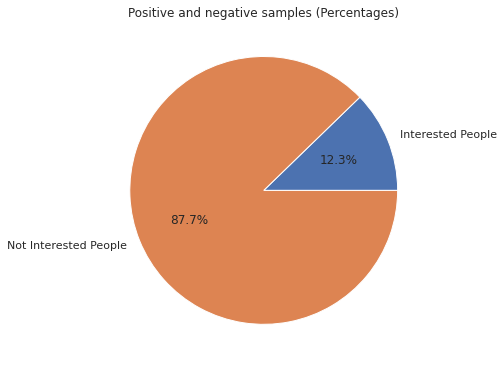

In [ ]:
#Calculating percentage of interested and not interested people for insurance

interested = abs(len(df[df['Response'] == 1])/len(df)*100)

not_interested = abs(len(df[df['Response'] == 0])/len(df)*100)

total_prcentage = [interested, not_interested]

# Creating a pie chart
plt.figure(figsize = (6,8))

plt.pie(total_prcentage, labels = ['Interested People','Not Interested People'], autopct = '%.1f%%')

plt.title('Positive and negative samples (Percentages)')

plt.show()

* Only 12% are interested in purchasing vehicle insurance.
* This is also showing the data imbalance as our response as yes is very less i.e 12% which will lead our model to a biased model.
* We will use Resampling technique to over come this data imbalance.





**Checking for outliers in numerical columns**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


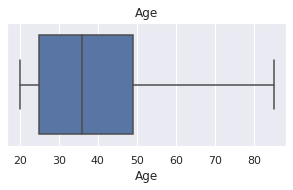

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


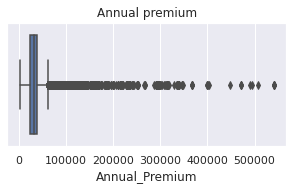

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


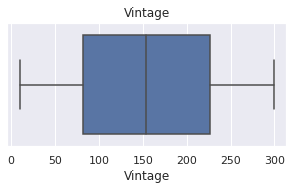

In [ ]:
# Plotting boxplots for checking outliers
plt.figure(figsize=(5,5))
plt.subplot(2,1,2)
sns.boxplot(df['Age'])
plt.title("Age")
plt.show()

plt.figure(figsize=(5,5))
plt.subplot(2,1,2)
sns.boxplot(df['Annual_Premium'])
plt.title("Annual premium")
plt.show()

plt.figure(figsize=(5,5))
plt.subplot(2,1,2)
sns.boxplot(df['Vintage'])
plt.title("Vintage")
plt.show()

**Annual premium has outliers because the premium amount depends on various factors. New and expensive cars generally have high amounts.**

**Annual Premium**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


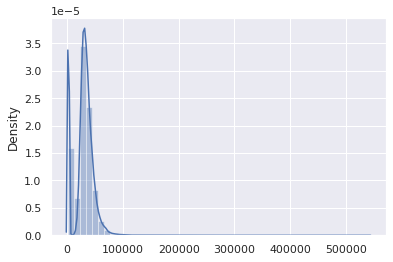

In [ ]:
#plotting distribution for annual premium
sns.distplot(x=df['Annual_Premium']);

* Right Skewed distribution.
* We can apply log transformation to see better.

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


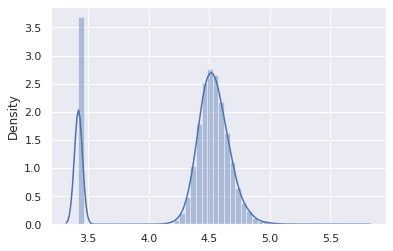

In [ ]:
# After applying log transformation
sns.distplot(x=np.log10(df['Annual_Premium']));

**The distribution looks better now.**

**Heatmap**

Text(0.5, 1.05, 'Correlation of Features')

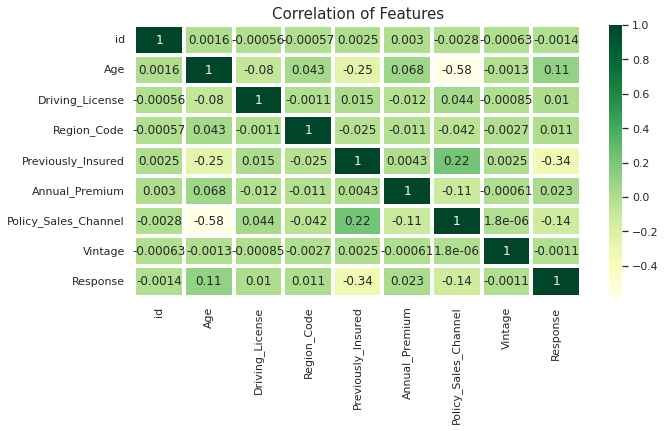

In [ ]:
#correlation
corr = df.corr()

f, ax = plt.subplots(figsize=(10,5))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Correlation of Features", y=1.05, size=15)

Target variable is not much affected by 'id' and 'Vintage variable'. We can drop least correlated variable.

# **Feature Engineering**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#initialize
le = LabelEncoder()
ohe = OneHotEncoder()

#mapping
df["Vehicle_Age"]=df["Vehicle_Age"].map({"> 2 Years":2,"1-2 Year":1,"< 1 Year":0})


#categorical to numerical
df['Gender'] = ohe.fit_transform(df[["Gender"]]).toarray()
df['Vehicle_Age'] = le.fit_transform(df[['Vehicle_Age']])
df['Vehicle_Damage'] = le.fit_transform(df[['Vehicle_Damage']])


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0.0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0.0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0.0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1.0,29,1,41.0,1,0,0,27496.0,152.0,39,0
5,6,1.0,24,1,33.0,0,0,1,2630.0,160.0,176,0
6,7,0.0,23,1,11.0,0,0,1,23367.0,152.0,249,0
7,8,1.0,56,1,28.0,0,1,1,32031.0,26.0,72,1
8,9,1.0,24,1,3.0,1,0,0,27619.0,152.0,28,0
9,10,1.0,32,1,6.0,1,0,0,28771.0,152.0,80,0


In [ ]:
X=df.drop(['Response'],axis=1) #contain all  independent variable
y=df['Response']           #dependent variable

**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
independent = df.drop(['Response'], axis=1) #Contain all independent variables
dependent = df['Response'] #Contain Dependent variable

In [ ]:
#Finding scores of each feature
f_scores = f_classif(independent, dependent)
f_scores

(array([7.13370735e-01, 1.05091307e+03, 4.76694479e+03, 3.93066928e+01,
        4.25827356e+01, 5.02033540e+04, 1.97325562e+04, 5.47422454e+04,
        1.94317587e+02, 7.51301151e+03, 4.20468707e-01]),
 array([3.98327606e-001, 3.18074235e-230, 0.00000000e+000, 3.62583444e-010,
        6.78391651e-011, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.72231514e-044, 0.00000000e+000, 5.16703652e-001]))

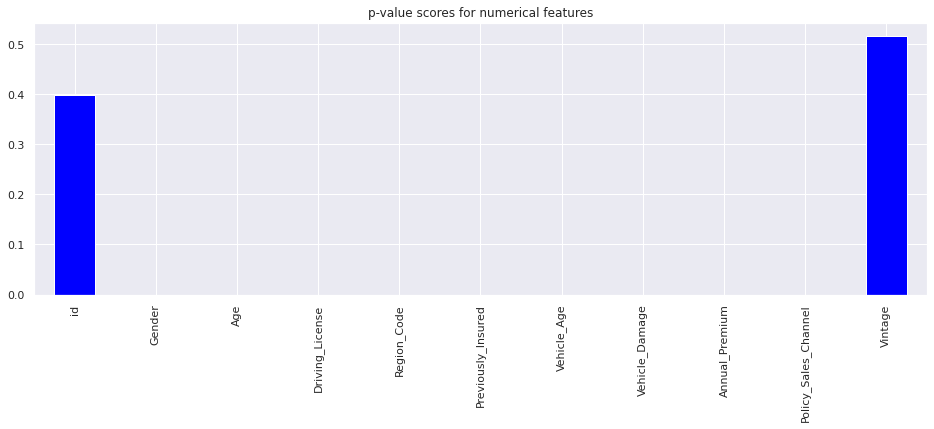

In [ ]:
#The Second array consists of p-values that we need.
p_values = pd.Series(f_scores[1], index= independent.columns)
p_values.plot(kind='bar', color='blue', figsize=(16,5))
plt.title('p-value scores for numerical features')
plt.show()


In [ ]:
#dropping id and vintage column
df.drop(["id","Vintage"],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting data into Testing and Training datasets
Xtrain,X_test,ytrain,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
#Checking shape of training dataset
Xtrain.shape

(304887, 11)

In [ ]:
#Checking shape of testing dataset
X_test.shape

(76222, 11)

In [ ]:
#data transformation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
X_test = scaler.transform(X_test)

* As we previously seen that our class data is imbalanced let us use Oversampling techique to balance our data before we go through model building.
* We will use SMOTE technique to balance our data.

In [ ]:
#importing SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
#getting balanced data
ove_smp = SMOTE(0.90)
X_train,y_train = ove_smp.fit_resample(Xtrain,ytrain)


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
print('The no. of classes before fit',format(Counter(ytrain)))
print('The no. of classes after fit',format(Counter(y_train)))

The no. of classes before fit Counter({0: 267347, 1: 37540})
The no. of classes after fit Counter({0: 267347, 1: 240612})


# **MODELLING**

# **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
model=LogisticRegression()
model=model.fit(X_train,y_train)
pred=model.predict(X_test)

accu_logreg = accuracy_score(y_test,pred)
recall_logreg = recall_score(y_test,pred)
prec_logreg = precision_score(y_test,pred)

#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print("Confusion matrix\n", confusion_matrix(y_test,pred))

Accuracy :  64.11272336070951
              precision    recall  f1-score   support

           0       0.99      0.60      0.74     67052
           1       0.25      0.97      0.39      9170

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Confusion matrix
 [[39939 27113]
 [  241  8929]]


In [ ]:
lr = LogisticRegression()
#Cross validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator= lr,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=5)

# **2. Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)

accu_dtree = accuracy_score(y_test,pred)
recall_dtree = recall_score(y_test,pred)
prec_dtree = precision_score(y_test,pred)


print(accuracy_score(y_test, pred)*100)
print(classification_report(y_test, pred))
print("Confusion matrix\n", confusion_matrix(y_test, pred))


81.8438246175645
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     67052
           1       0.28      0.33      0.30      9170

    accuracy                           0.82     76222
   macro avg       0.59      0.61      0.60     76222
weighted avg       0.83      0.82      0.82     76222

Confusion matrix
 [[59397  7655]
 [ 6184  2986]]


# **3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rtree = RandomForestClassifier(n_estimators=120,)
Rtree.fit(X_train, y_train)
pred = Rtree.predict(X_test)

accu_Rtree = accuracy_score(y_test,pred)
recall_Rtree = recall_score(y_test,pred)
prec_Rtree = precision_score(y_test,pred)


print(accuracy_score(y_test, pred)*100)
print(classification_report(y_test, pred))
print("Confusion matrix\n", confusion_matrix(y_test, pred))


83.77896145469812
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     67052
           1       0.34      0.36      0.35      9170

    accuracy                           0.84     76222
   macro avg       0.63      0.63      0.63     76222
weighted avg       0.84      0.84      0.84     76222

Confusion matrix
 [[60523  6529]
 [ 5835  3335]]


In [ ]:
#Hyper parameter tuning
rf = RandomForestClassifier(random_state=40)
#Cross validation and hyperparameter tuning
rf_bayes = BayesSearchCV(estimator= rf,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=5)

# **4. XG Boost**

In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
pred = xgb_model.predict(X_test)

accu_xgb = accuracy_score(y_test,pred)
recall_xgb = recall_score(y_test,pred)
prec_xgb = precision_score(y_test,pred)


print(accuracy_score(y_test, pred)*100)
print(classification_report(y_test, pred))
print("Confusion matrix\n", confusion_matrix(y_test, pred))


74.48505680774579
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     67052
           1       0.29      0.80      0.43      9170

    accuracy                           0.74     76222
   macro avg       0.63      0.77      0.63     76222
weighted avg       0.88      0.74      0.79     76222

Confusion matrix
 [[49408 17644]
 [ 1804  7366]]


In [ ]:
#hyper parameter tuning
xgb = XGBoostClassifier()
#Cross validation and hyperparameter tuning
xgb_bayes = BayesSearchCV(estimator= xgb,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=4)

gb_bayes.fit(X_train,y_train)

# **5. LGBM Classifier**

In [ ]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)

accu_lgbm = accuracy_score(y_test,pred)
recall_lgbm = recall_score(y_test,pred)
prec_lgbm = precision_score(y_test,pred)


print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))


83.6372700795046
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     67052
           1       0.35      0.43      0.39      9170

    accuracy                           0.84     76222
   macro avg       0.64      0.66      0.65     76222
weighted avg       0.85      0.84      0.84     76222

Confusion matrix
 [[59834  7218]
 [ 5254  3916]]


In [ ]:
lgbm = LGBMClassifier()
#Cross validation and hyperparameter tuning
lg_bayes = BayesSearchCV(estimator= lgbm,
                         search_spaces = {
                          'max_depth':Integer(4,100) ,
                          'num_leaves': Integer(3,200),
                          'n_estimators': Integer(3,200),
                          'min_split_gain': Integer(1.0,10.0),
                          'n_jobs': Integer(1,30),
                        },
                       cv = 5, verbose=2, scoring='accuracy', n_iter=10)

lg_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=71, min_split_gain=7, n_estimators=189, n_jobs=6, num_leaves=190; total time=  15.4s
[CV] END max_depth=71, min_split_gain=7, n_estimators=189, n_jobs=6, num_leaves=190; total time=   9.9s
[CV] END max_depth=71, min_split_gain=7, n_estimators=189, n_jobs=6, num_leaves=190; total time=   9.7s
[CV] END max_depth=71, min_split_gain=7, n_estimators=189, n_jobs=6, num_leaves=190; total time=   9.8s
[CV] END max_depth=71, min_split_gain=7, n_estimators=189, n_jobs=6, num_leaves=190; total time=   9.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=17, min_split_gain=2, n_estimators=195, n_jobs=16, num_leaves=184; total time=  32.2s
[CV] END max_depth=17, min_split_gain=2, n_estimators=195, n_jobs=16, num_leaves=184; total time=  24.0s
[CV] END max_depth=17, min_split_gain=2, n_estimators=195, n_jobs=16, num_leaves=184; total time=  23.9s
[CV] END max_depth=17, min_split_gain=2, n_esti

BayesSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=4, high=100, prior='uniform', transform='normalize'),
                             'min_split_gain': Integer(low=1.0, high=10.0, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=3, high=200, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=3, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
lg_bayes.best_params_

OrderedDict([('max_depth', 73),
             ('min_split_gain', 2),
             ('n_estimators', 141),
             ('n_jobs', 9),
             ('num_leaves', 114)])

In [ ]:
lg_bayes.best_estimator_

LGBMClassifier(max_depth=73, min_split_gain=2, n_estimators=141, n_jobs=9,
               num_leaves=114)

In [ ]:
#make prediction
lgtrain_pred=lg_bayes.best_estimator_.predict(X_train)
lgtest_pred=lg_bayes.best_estimator_.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train, lgtrain_pred)
test_accuracy = accuracy_score(y_test, lgtest_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.903817040351682
The accuracy on test dataset is 0.8629791923591614


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train, lgtrain_pred)
test_cm = confusion_matrix(y_test, lgtest_pred)

In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,lgtrain_pred))
print("\n")
print(classification_report(y_test,lgtest_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91    267347
           1       0.94      0.85      0.89    240612

    accuracy                           0.90    507959
   macro avg       0.91      0.90      0.90    507959
weighted avg       0.91      0.90      0.90    507959



              precision    recall  f1-score   support

           0       0.90      0.95      0.92     67052
           1       0.38      0.22      0.28      9170

    accuracy                           0.86     76222
   macro avg       0.64      0.59      0.60     76222
weighted avg       0.84      0.86      0.85     76222



In [ ]:
from sklearn import metrics

# **6. Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

accu_gb = accuracy_score(y_test,pred)
recall_gb = recall_score(y_test,pred)
prec_gb = precision_score(y_test,pred)


print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))

74.94161790559156
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     67052
           1       0.30      0.78      0.43      9170

    accuracy                           0.75     76222
   macro avg       0.63      0.76      0.63     76222
weighted avg       0.88      0.75      0.79     76222

Confusion matrix
 [[49965 17087]
 [ 2013  7157]]


In [ ]:
#hyper parameter tuning
gb = GradientBoostingClassifier()
#Cross validation and hyperparameter tuning                                                                                                                                      
gb_bayes = BayesSearchCV(estimator= gb,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=4)

gb_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=39, max_features=log2, min_samples_leaf=60, min_samples_split=39, n_estimators=59; total time= 4.3min
[CV] END max_depth=39, max_features=log2, min_samples_leaf=60, min_samples_split=39, n_estimators=59; total time= 3.9min
[CV] END max_depth=39, max_features=log2, min_samples_leaf=60, min_samples_split=39, n_estimators=59; total time= 3.8min
[CV] END max_depth=39, max_features=log2, min_samples_leaf=60, min_samples_split=39, n_estimators=59; total time= 3.8min
[CV] END max_depth=39, max_features=log2, min_samples_leaf=60, min_samples_split=39, n_estimators=59; total time= 3.8min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=38, max_features=log2, min_samples_leaf=47, min_samples_split=19, n_estimators=123; total time= 9.3min
[CV] END max_depth=38, max_features=log2, min_samples_leaf=47, min_samples_split=19, n_estimators=123; total time= 9.1min
[CV] END max_depth=38, max_featur

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=4,
              scoring='accuracy',
              search_spaces={'max_depth': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=140, prior='uniform', transform='normalize')},
              verbose=2)

# **7. K Neighbours Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred=knc.predict(X_test)

accu_knc = accuracy_score(y_test,pred)
recall_knc = recall_score(y_test,pred)
prec_knc = precision_score(y_test,pred)


print("Accuracy:" ,accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))

Accuracy: 75.48345621998898
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     67052
           1       0.27      0.63      0.38      9170

    accuracy                           0.75     76222
   macro avg       0.61      0.70      0.62     76222
weighted avg       0.86      0.75      0.79     76222

Confusion matrix
 [[51735 15317]
 [ 3370  5800]]


In [ ]:
## Comparing the performance of the models
ind=['Logistic regression','Decision Tree','Randomforest','XGBClassifier','LgbmClassifier','Gradient Boosting Classifier','K Neighbours Classifier']
df={"Accuracy":[accu_logreg,accu_dtree,accu_Rtree,accu_xgb,accu_lgbm,accu_gb,accu_knc],"Recall":[recall_logreg,recall_dtree,recall_Rtree,recall_xgb,recall_lgbm,recall_gb,recall_knc],"Precision":[prec_logreg,prec_dtree,prec_Rtree,prec_xgb,prec_lgbm,prec_gb,prec_knc]}
result=pd.DataFrame(data=df,index=ind)
result

,Accuracy,Recall,Precision
Logistic regression,0.641127,0.973719,0.247739
Decision Tree,0.818438,0.325627,0.280613
Randomforest,0.837790,0.363686,0.338098
XGBClassifier,0.744851,0.803272,0.294522
LgbmClassifier,0.744851,0.803272,0.294522
Gradient Boosting Classifier,0.744851,0.803272,0.294522
K Neighbours Classifier,0.744851,0.803272,0.294522


## Let's perform Cross Validation and Hyper parameter tuning on these models to get better results.

**HYPER PARAMETER TUNING**

In [ ]:
pip install scikit-optimize 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based class
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()